#**星雲爆炸與雙模式圓環脈衝動畫**

這份作業是一個結合數學函數圖形視覺化與動畫的作品

##重點整理：

- **結合數學與美學**：使用三維座標、向量運算與 trigonometric 函數來生成視覺效果。
- **模擬宇宙能量場**：星點從中心爆炸，圓環在不同平面上擴張與震盪，營造出星雲脈動的感覺。


In [ ]:
# 匯入必要模組
import numpy as np  # 數值運算模組，用於建立座標與數據
import matplotlib.pyplot as plt # 繪圖模組，支援 2D/3D 圖形與動畫
from matplotlib.animation import FuncAnimation  # 動畫模組，讓 matplotlib 支援動態更新
from mpl_toolkits.mplot3d import Axes3D # 3D 繪圖工具包，啟用三維座標軸
from IPython.display import HTML    # 在 Jupyter Notebook 中嵌入 HTML 動畫

##黑色主題 3D 視覺化框架設定
- 3D視覺化框架
- 設定背景顏色
- 設定座標軸
- 設定座標軸標籤、顏色



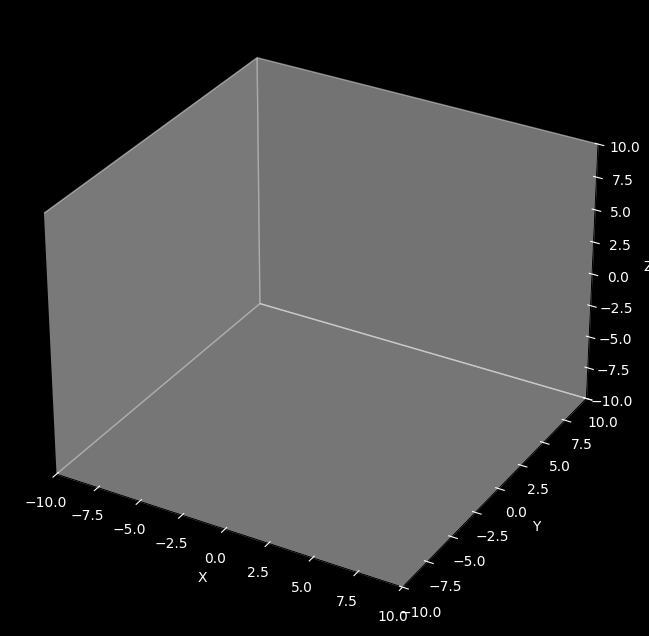

In [ ]:
# 建立黑色主題的 3D 視覺化框架
fig = plt.figure(figsize=(10, 8))  # 設定畫布大小
ax = fig.add_subplot(111, projection='3d')  # 建立 3D 子圖

# 設定背景顏色
fig.patch.set_facecolor('black')  # 整體背景
ax.set_facecolor('black')     # 座標區背景

# 設定座標軸範圍
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])

# 設定座標軸標籤與顏色
ax.set_xlabel('X', color='white')
ax.set_ylabel('Y', color='white')
ax.set_zlabel('Z', color='white')

# 美化刻度與格線
ax.tick_params(colors='white')  # 刻度顏色
ax.grid(False)          # 關閉格線

##星點初始化：螺旋星雲的基礎粒子設定
- 星點數量、速度
- XYZ平面方向角度
- 星點色彩
- 初始位置

In [ ]:
# 星點初始化
num_points = 1000   #星點數量
angles_xy = np.random.uniform(0, 2*np.pi, num_points)   # XY平面角度（環繞中心旋轉）
angles_z = np.random.uniform(-1, 1, num_points) #Z 軸方向角度（控制上下分布）
speeds = np.random.uniform(0.5, 2.5, num_points)    #星點速度（可用於動態更新）

#為每個星點分配獨立色彩（用於 colormap 映射）
scatter_colors = np.random.rand(num_points)

# 星點初始位置（集中於原點）
x0 = np.zeros(num_points)
y0 = np.zeros(num_points)
z0 = np.zeros(num_points)

## 多層圓環星雲結構初始化
- 圓環平面數量、分配顏色
- 建立漸層色彩陣列

In [ ]:
# 定義圓環平面數量（每層代表一個 Z 軸高度）
num_planes = np.random.randint(10, 15)

# 每個平面上的圓環數量（3 到 4 個不等）
plane_ring_counts = [np.random.randint(3, 5) for _ in range(num_planes)]

# 總圓環數量（用於分配顏色）
total_rings = sum(plane_ring_counts)

# 建立漸層色彩陣列（使用 Blues colormap）
cmap = plt.cm.Blues
ring_colors = cmap(np.linspace(0.3, 1, total_rings))

## 多層圓環星雲的動態資料模型
- 控制圓環方向
- 分配色彩
- 動態模式
- 圓環屬性

## 數學函數與概念(1)

### **向量運算：`np.cross`、`np.linalg.norm`**
- 用於：
  - 建立圓環所在平面（法向量 → 平面基底向量）
  - 正規化向量，確保方向一致
- 例子：
  ```python
    normal = np.random.randn(3)
    normal /= np.linalg.norm(normal)
  ```

### **隨機分布：`np.random.uniform`、`np.random.randn`**
- 用於：
  - 隨機生成圓環大小、位置、脈衝速度、顏色、方向
  - 模擬宇宙中不規則的能量分佈
- 例子：
  ```python
    normal = np.random.randn(3)
    radius_base': np.random.uniform(1, 3)
  ```

In [ ]:
# 建立 ring_data：儲存每個圓環的屬性
ring_data = []

color_index = 0
for i in range(num_planes):
    # 隨機生成平面法向量（控制圓環方向）
    normal = np.random.randn(3)
    normal /= np.linalg.norm(normal)

    # 圓環中心（設在原點）
    center = np.array([0.0, 0.0, 0.0])

    for _ in range(plane_ring_counts[i]):
        color = ring_colors[color_index]  # 分配色彩
        mode = np.random.choice(['pulse', 'expand'])  # 動態模式

        # 儲存圓環屬性
        ring_data.append({
            'normal': normal,              # 平面方向
            'center': center,              # 中心位置
            'mode': mode,                  # 動態模式
            'state': 'expand',             # 初始狀態
            'radius': 0.1,                 # 初始半徑
            'radius_base': np.random.uniform(1, 3),  # 基礎半徑
            'phase': np.random.uniform(0, 2*np.pi),  # 相位偏移
            'linewidth': np.random.uniform(1.0, 4.0),# 線寬
            'alpha': 1.0,                  # 透明度
            'color': color[:3]             # RGB 色彩（去除 alpha）
        })

        color_index += 1


##動畫更新步驟

### 視覺特性

| 元素        | 效果描述 |
|-------------|-----------|
| 星點        | 從原點向外爆炸，具備色彩閃爍與速度差異 |
| 圓環        | 根據法向量分布於空間，具備脈衝或擴張動畫 |
| 色彩        | 使用 `plasma` 與 `Blues` colormap，呈現層次感 |
| 透明度      | 動態變化，營造呼吸感與深度感 |
| 結構控制    | 每個圓環獨立控制半徑、相位、線寬與模式 |


有的，你的程式碼裡大量運用了數學函數，而且非常巧妙地將它們轉化為視覺效果。以下是重點整理：

## 數學函數與概念(2)

### **三角函數：**
- `sin` : $$f(x)=sin(x)$$

- `cos` : $$f(x)=cos(x)$$

- 用於：
  - 建立圓環座標（極座標轉直角座標）
  - 控制脈衝震盪（圓環半徑與透明度隨時間變化）
- 例子：
  ```python
    x_ring = center[0] + r_ring * (np.cos(theta) * v1[0] + np.sin(theta) * v2[0])
    y_ring = center[1] + r_ring * (np.cos(theta) * v1[1] + np.sin(theta) * v2[1])
    z_ring = center[2] + r_ring * (np.cos(theta) * v1[2] + np.sin(theta) * v2[2])
  ```

### **極座標轉換與空間幾何**
- 將圓環從 2D 極座標轉換到 3D 空間中任意方向
- 利用法向量建立旋轉平面，讓圓環分佈在不同角度

In [ ]:
def update(frame):
    # 1清除前一幀的圖形元素
    for coll in ax.collections: coll.remove()
    for line in ax.lines: line.remove()
    for txt in ax.texts: txt.remove()

    # 2️星點爆炸動畫
    r = frame * 0.2
    x = r * np.cos(angles_xy) * speeds
    y = r * np.sin(angles_xy) * speeds
    z = r * angles_z * speeds
    flicker = np.sin(frame * 0.1 + scatter_colors * 10)
    ax.scatter(x, y, z, s=1, c=plt.cm.plasma(flicker), alpha=0.8)

    # 3圓環動畫（脈衝 / 擴張）
    for ring in ring_data:
        # 建立圓環平面座標系
        theta = np.linspace(0, 2*np.pi, 100)
        center, normal = ring['center'], ring['normal']
        color = ring_colors[np.random.randint(len(ring_colors))]
        linewidth = ring['linewidth']

        # 建立平面向量 v1, v2（垂直於 normal）
        if np.allclose(normal, [0, 0, 1]):
            v1 = np.array([1, 0, 0])
        else:
            v1 = np.cross(normal, [0, 0, 1])
            v1 /= np.linalg.norm(v1)
        v2 = np.cross(normal, v1)

        # 模式處理：pulse / expand
        if ring['mode'] == 'pulse':
            if ring['state'] == 'expand':
                ring['radius'] += 0.05
                if ring['radius'] >= ring['radius_base']:
                    ring['state'] = 'pulse'
                    ring['radius'] = ring['radius_base']
                r_ring = ring['radius']
                alpha = 1.0
            else:
                phase = ring['phase']
                r_ring = ring['radius_base'] + 0.5 * np.sin(frame * 0.1 + phase)
                alpha = 0.5 + 0.5 * np.sin(frame * 0.1 + phase)
        elif ring['mode'] == 'expand':
            ring['radius'] += 0.2
            ring['alpha'] = max(0, ring['alpha'] - 0.02)
            r_ring = ring['radius']
            alpha = ring['alpha']

        # 建立圓環座標
        x_ring = center[0] + r_ring * (np.cos(theta) * v1[0] + np.sin(theta) * v2[0])
        y_ring = center[1] + r_ring * (np.cos(theta) * v1[1] + np.sin(theta) * v2[1])
        z_ring = center[2] + r_ring * (np.cos(theta) * v1[2] + np.sin(theta) * v2[2])

        # 繪製圓環
        rgba_color = list(color) + [alpha]
        ax.plot(x_ring, y_ring, z_ring, color=color, alpha=alpha, linewidth=linewidth)

    # 顯示原點標記
    ax.text(0, 0, 0, "(0,0,0)", color='white', fontsize=10)

##  動畫輸出

In [ ]:
ani = FuncAnimation(fig, update, frames=100, interval=50)
plt.close(fig)
HTML(ani.to_html5_video())